In [1]:
import cv2
import numpy as np
import torch
from models import SINet
import matplotlib.pyplot as plt
import torchvision.transforms as T


In [2]:
torch.cuda.init()

model = SINet()

state_dict = torch.load('checkpoints/best_model.pt')
model.load_state_dict(state_dict)

model = model.cuda()



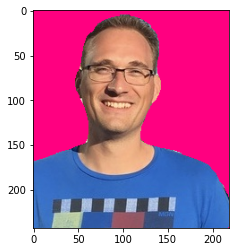

In [3]:
model.eval()

data_info = torch.load('datasets/data_info.pt')


with torch.no_grad():
    frame = cv2.imread('samples/portrait.jpg')
    
    frame = frame[30:, 20:,:]

    transform = T.Compose([T.ToTensor(),
                           T.Normalize(data_info['mean'].reshape((3, 1, 1)) / 255.,
                                       data_info['std'].reshape((3, 1, 1)) / 255.)])

    img = transform(cv2.resize(frame, (224, 224))[..., ::-1].copy())

    img = img.cuda()

    m = model(img.unsqueeze(0))

    mask = m.squeeze().detach().cpu().numpy()>=0.5

    mask = cv2.resize(mask.astype(np.uint8), tuple(frame.shape[:2][::-1]))

    frame[mask==0, :]=np.array((128,0,255)).reshape((1,1,3))
    
    plt.imshow(frame[...,::-1])
    
    cv2.imwrite('samples/mask.png', 255*mask)
    cv2.imwrite('samples/result.jpg', frame)
    

    